# Load and Explore the Flower Dataset
*by Marvin Bertin*
<img src="../../images/keras-tensorflow-logo.jpg" width="400">

# Image Classification Task
Cifar10 is a famous computer-vision dataset used for object recognition.

The dataset consists of:
- colored images of various sizes
- 5 classes
- 700 images per classes

<img src="../../images/flowers.png" width="600">

# Imports

In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import tarfile
from six.moves import urllib
from glob import glob
import random
import shutil

import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Download Helper Function

In [15]:
def download_and_uncompress_tarball(tarball_url, dataset_dir):
    """Downloads the `tarball_url` and uncompresses it locally.
    Args:
    tarball_url: The URL of a tarball file.
    dataset_dir: The directory where the temporary files are stored.
    """
    filename = tarball_url.split('/')[-1]
    filepath = os.path.join(dataset_dir, filename)

    def _progress(count, block_size, total_size):
        sys.stdout.write('\r>> Downloading %s %.1f%%' % (
            filename, float(count * block_size) / float(total_size) * 100.0))
        sys.stdout.flush()
        
    filepath, _ = urllib.request.urlretrieve(tarball_url, filepath, _progress)
    print()
    statinfo = os.stat(filepath)
    print('Successfully downloaded', filename, statinfo.st_size, 'bytes.')
    tarfile.open(filepath, 'r:gz').extractall(dataset_dir)

# Download Flower Dataset

In [16]:
# The URL where the Flowers data can be downloaded.
DATA_URL = "http://download.tensorflow.org/example_images/flower_photos.tgz"
BASE_DIR = "/Users/marvinbertin/Desktop/tmp"

In [10]:
download_and_uncompress_tarball(DATA_URL, BASE_DIR)

>> Downloading flower_photos.tgz 98.5%

# Load Data Files

In [3]:
def load_data_files(base_dir):
    RAW_DATASET = os.path.join(base_dir,"flower_photos")

    sub_dir = map(lambda d: os.path.basename(d.rstrip("/")), glob(os.path.join(RAW_DATASET,'*/')))

    data_dic = {}
    for class_name  in sub_dir:
        imgs = glob(os.path.join(RAW_DATASET,class_name,"*.jpg"))

        data_dic[class_name] = imgs
        print("Class: {}".format(class_name))
        print("Number of images: {} \n".format(len(imgs)))
        
    return data_dic

In [17]:
data_dic = load_data_files(BASE_DIR)

Class: daisy
Number of images: 633 

Class: dandelion
Number of images: 898 

Class: roses
Number of images: 641 

Class: sunflowers
Number of images: 699 

Class: tulips
Number of images: 799 



# Plotting Helper Function

In [7]:
def plot_image_grid(images_files):
    # figure size
    fig = plt.figure(figsize=(8, 8))
    
    # load images
    images = [tf.contrib.keras.preprocessing.image.load_img(img) for img in images_files]
    
    # plot image grid
    for x in range(4):
        for y in range(4):
            ax = fig.add_subplot(4, 4, 4*y+x+1)
            plt.imshow(images[4*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

# Explore Flower Dataset

Flower type: tulips


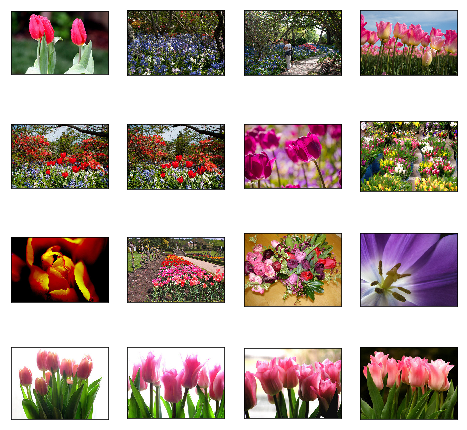

Flower type: roses


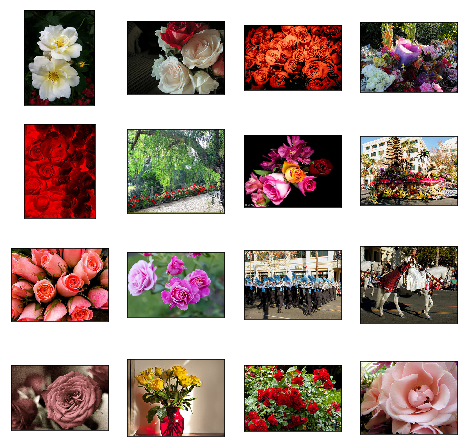

Flower type: dandelion


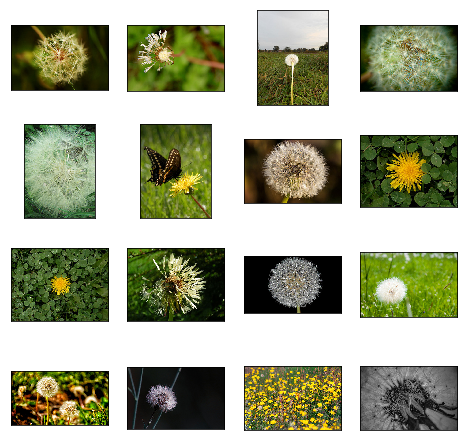

Flower type: sunflowers


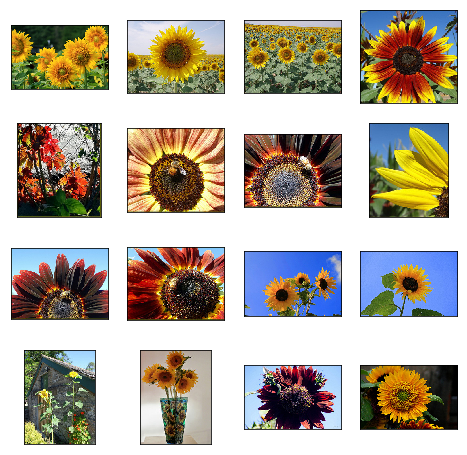

Flower type: daisy


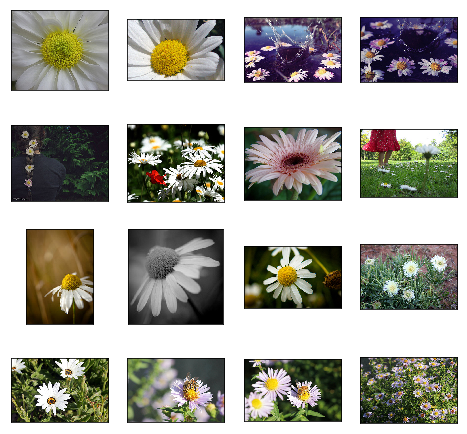

In [18]:
for class_name, imgs in data_dic.iteritems():
    print("Flower type: {}".format(class_name))
    plot_image_grid(imgs[:16])

# Split Into Train and Validation Sets

In [9]:
# Create new directory and copy files to it
def copy_files_to_directory(files, directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print("Created directory: {}".format(directory))

    for f in files:
        shutil.copy(f, directory)
    print("Copied {} files.\n".format(len(files)))

In [10]:
def train_validation_split(base_dir, data_dic, split_ratio=0.2):
    FLOWER_DATASET = os.path.join(base_dir,"flower_dataset")

    if not os.path.exists(FLOWER_DATASET):
        os.makedirs(FLOWER_DATASET)

    for class_name, imgs in data_dic.iteritems():
        idx_split = int(len(imgs) * split_ratio)
        random.shuffle(imgs)
        validation = imgs[:idx_split]
        train = imgs[idx_split:]

        copy_files_to_directory(train, os.path.join(FLOWER_DATASET,"train",class_name))
        copy_files_to_directory(validation, os.path.join(FLOWER_DATASET,"validation",class_name))

In [19]:
train_validation_split(BASE_DIR, data_dic, split_ratio=0.2)

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/train/tulips
Copied 640 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/validation/tulips
Copied 159 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/train/roses
Copied 513 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/validation/roses
Copied 128 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/train/dandelion
Copied 719 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/validation/dandelion
Copied 179 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/train/sunflowers
Copied 560 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/validation/sunflowers
Copied 139 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/train/daisy
Copied 507 files.

Created directory: /Users/marvinbertin/Desktop/tmp/flower_dataset/validation/daisy
Copi

## Next Lesson
### RestNet Architecture
- Deep Residual Learning for Image Recognition
- Skip connections and deep residual blocks

<img src="../../images/divider.png" width="100">